In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('dataset/bank_marketing_clean.csv')

In [3]:
df_process = df.copy()

In [4]:
# separation variable num et categorielles

var_num = df_process.select_dtypes(exclude='object').columns
var_cat = df_process.select_dtypes(include='object').columns

In [5]:
# Normalisation des variables numeriques

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(df_process[var_num])
df_process[var_num] = X_scaled

In [6]:
# encodage des variables categorielles binaire seulement

# Sélectionner les colonnes binaires
bin_col = [col for col in var_cat if df_process[col].nunique() == 2]

# Retirer 'contact' de la liste
bin_col.remove('contact')

# Mapper les valeurs 'yes' et 'no' en 1 et 0
for col in bin_col:
    df_process[col] = df_process[col].map({'yes': 1, 'no': 0})


In [7]:
# encodage des variables categorielles multiclasses par 'onehotencoder'
cat_cols = df_process.select_dtypes(include=['object']).columns.difference(bin_col)

encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = encoder.fit_transform(df_process[cat_cols])

cat_encoded_df = pd.DataFrame(cat_encoded, columns= encoder.get_feature_names_out(cat_cols))
df_process = pd.concat([df_process.drop(columns=cat_cols), cat_encoded_df], axis = 1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_process.to_csv('modeling_data.csv', index = False)

In [10]:
df_process

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0.571429,0,0,0,0.053070,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.581633,0,0,0,0.030297,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.377551,0,1,0,0.045954,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.408163,0,0,0,0.030704,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.571429,0,0,1,0.062424,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.744898,0,1,0,0.067914,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41172,0.469388,0,0,0,0.077877,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41173,0.571429,0,1,0,0.038430,0.035714,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41174,0.448980,0,0,0,0.089874,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  float64
 1   default                        41176 non-null  int64  
 2   housing                        41176 non-null  int64  
 3   loan                           41176 non-null  int64  
 4   duration                       41176 non-null  float64
 5   campaign                       41176 non-null  float64
 6   pdays                          41176 non-null  float64
 7   previous                       41176 non-null  float64
 8   emp.var.rate                   41176 non-null  float64
 9   cons.price.idx                 41176 non-null  float64
 10  cons.conf.idx                  41176 non-null  float64
 11  euribor3m                      41176 non-null  float64
 12  nr.employed                    41176 non-null 

In [12]:
# separation des variables explicatives et variable cible

X = df_process.drop('y', axis = 1)
y = df_process['y']

In [13]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Fitting 5 folds for each of 112 candidates, totalling 560 fits
# Best Parameters:  {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
# Best Score:  0.9117486338797814

In [15]:
# remedier l'equilibre de classe par 'SMOTE' 

# Définir SMOTE et le modèle de régression logistique
smote = SMOTE(random_state=42)
logreg = LogisticRegression(C=100, penalty='l2', solver='liblinear', max_iter=100) # d'apres gridsearch

# Créer un pipeline avec SMOTE et la régression logistique
pipeline = Pipeline([
    ('smote', smote),
    ('logreg', logreg)
])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# evaluation sur X_train
train_score = pipeline.score(X_train, y_train)
print("Train Score: ", train_score)

# evaluation sur X_test
test_score = pipeline.score(X_test, y_test)
print("Test Score: ", test_score)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

Train Score:  0.8693685488767456
Test Score:  0.8614618746964546
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7265
           1       0.45      0.86      0.59       971

    accuracy                           0.86      8236
   macro avg       0.72      0.86      0.75      8236
weighted avg       0.92      0.86      0.88      8236



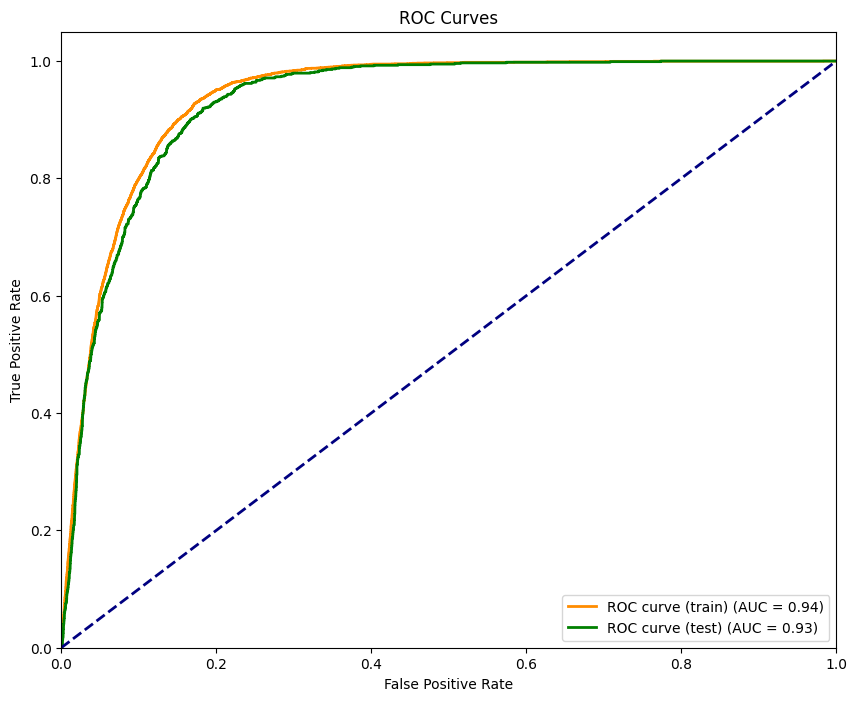

In [16]:
# Obtenir les probabilités pour la classe positive
y_train_proba = pipeline.predict_proba(X_train)[:, 1]
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

# courbes ROC et l'AUC pour train et test
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

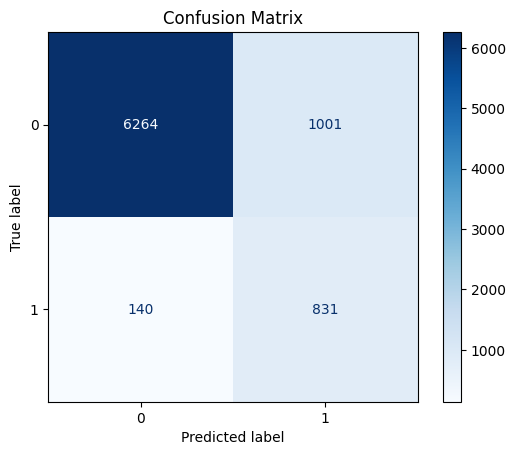

In [17]:
# matrice de de confusion 
cm = confusion_matrix(y_test, y_pred)

# Plot matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

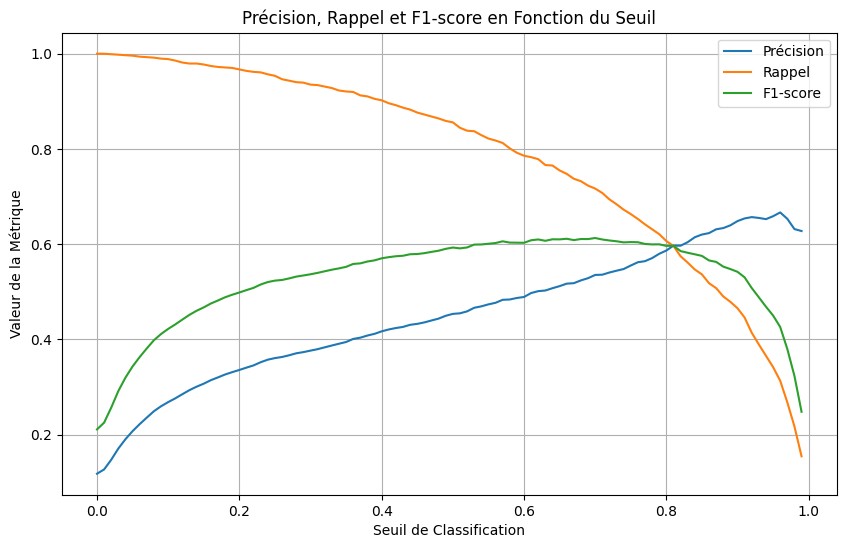

In [18]:
# Optimisation du seuil en maximisant le f1-score

thresholds = np.arange(0.0, 1.0, 0.01)

precisions = []
rappels = []
f1_scores = []

for i in thresholds:
    # Convertir les probabilités en prédictions binaires basées sur le seuil
    y_pred_thresholds = (y_test_proba >= i).astype(int)
    
    # Calculer les métriques
    precisions.append(precision_score(y_test, y_pred_thresholds))
    rappels.append(recall_score(y_test, y_pred_thresholds))
    f1_scores.append(f1_score(y_test, y_pred_thresholds))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Précision')
plt.plot(thresholds, rappels, label='Rappel')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Seuil de Classification')
plt.ylabel('Valeur de la Métrique')
plt.title('Précision, Rappel et F1-score en Fonction du Seuil')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# F1-score maximal
indice_max_f1 = np.argmax(f1_scores)
threshold_optimal = thresholds[indice_max_f1]

# Générer les prédictions au seuil optimal
y_pred_optimal = (y_test_proba >= threshold_optimal).astype(int)

# evaluation sur X_test
test_score = pipeline.score(X_test, y_pred_optimal)
print("Test Score: ", test_score)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_optimal))



Test Score:  0.9354055366682856
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7265
           1       0.54      0.72      0.61       971

    accuracy                           0.89      8236
   macro avg       0.75      0.82      0.78      8236
weighted avg       0.91      0.89      0.90      8236



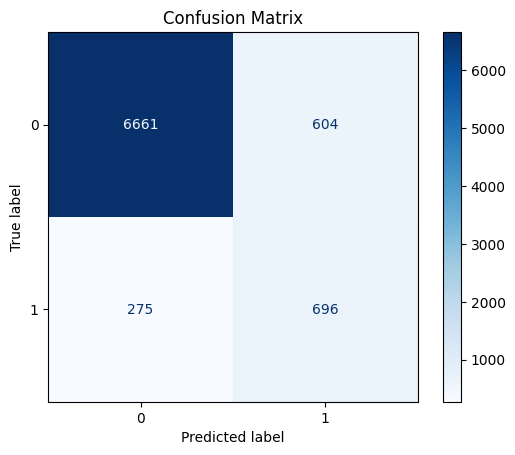

In [22]:
# matrice de de confusion 
cm = confusion_matrix(y_test, y_pred_optimal)

# Plot matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

C:\Users\RASAMISON Lovatiana\AppData\Local\Temp\ipykernel_35468\238960715.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


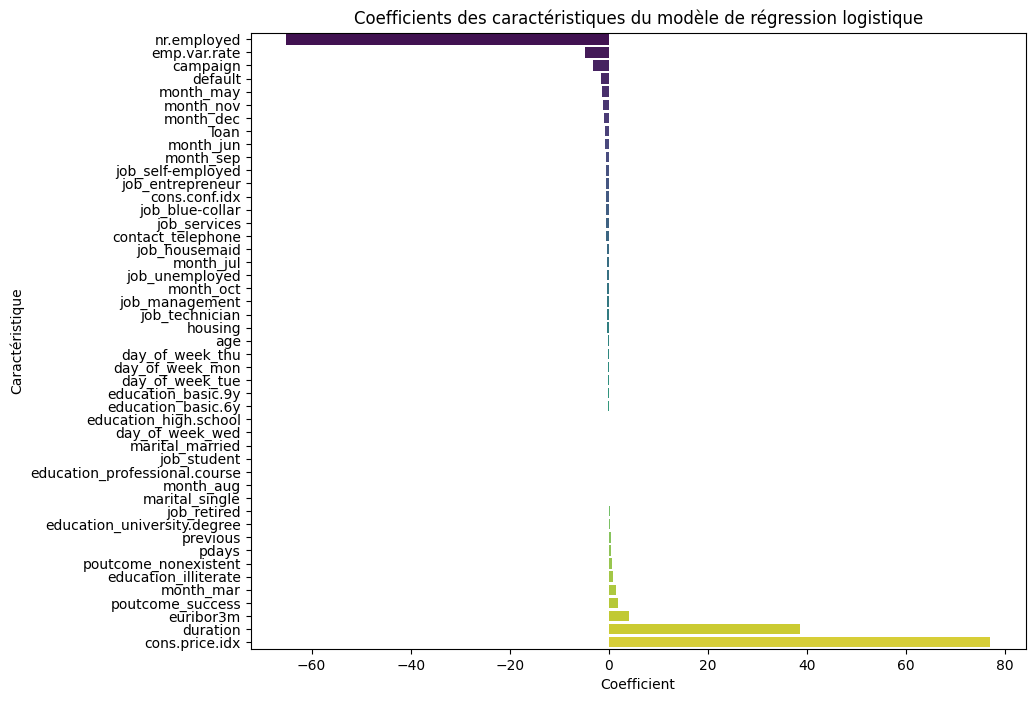

In [28]:
# explication du modele

# Afficher les coefficients du modèle
feature_names = X_train.columns
coefficients = pipeline.named_steps['logreg'].coef_[0]

# Créer un DataFrame pour organiser les coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', inplace=True)

# Tracer les coefficients en utilisant seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Coefficients des caractéristiques du modèle de régression logistique')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.show()

In [30]:
coef_df

,Feature,Coefficient
12,nr.employed,-65.195908
8,emp.var.rate,-4.747752
5,campaign,-3.069716
1,default,-1.599416
41,month_may,-1.310211
42,month_nov,-1.174765
37,month_dec,-0.861924
3,loan,-0.772388
39,month_jun,-0.661674
44,month_sep,-0.601739
